In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
football = pd.read_csv('cbsFootballData.csv')

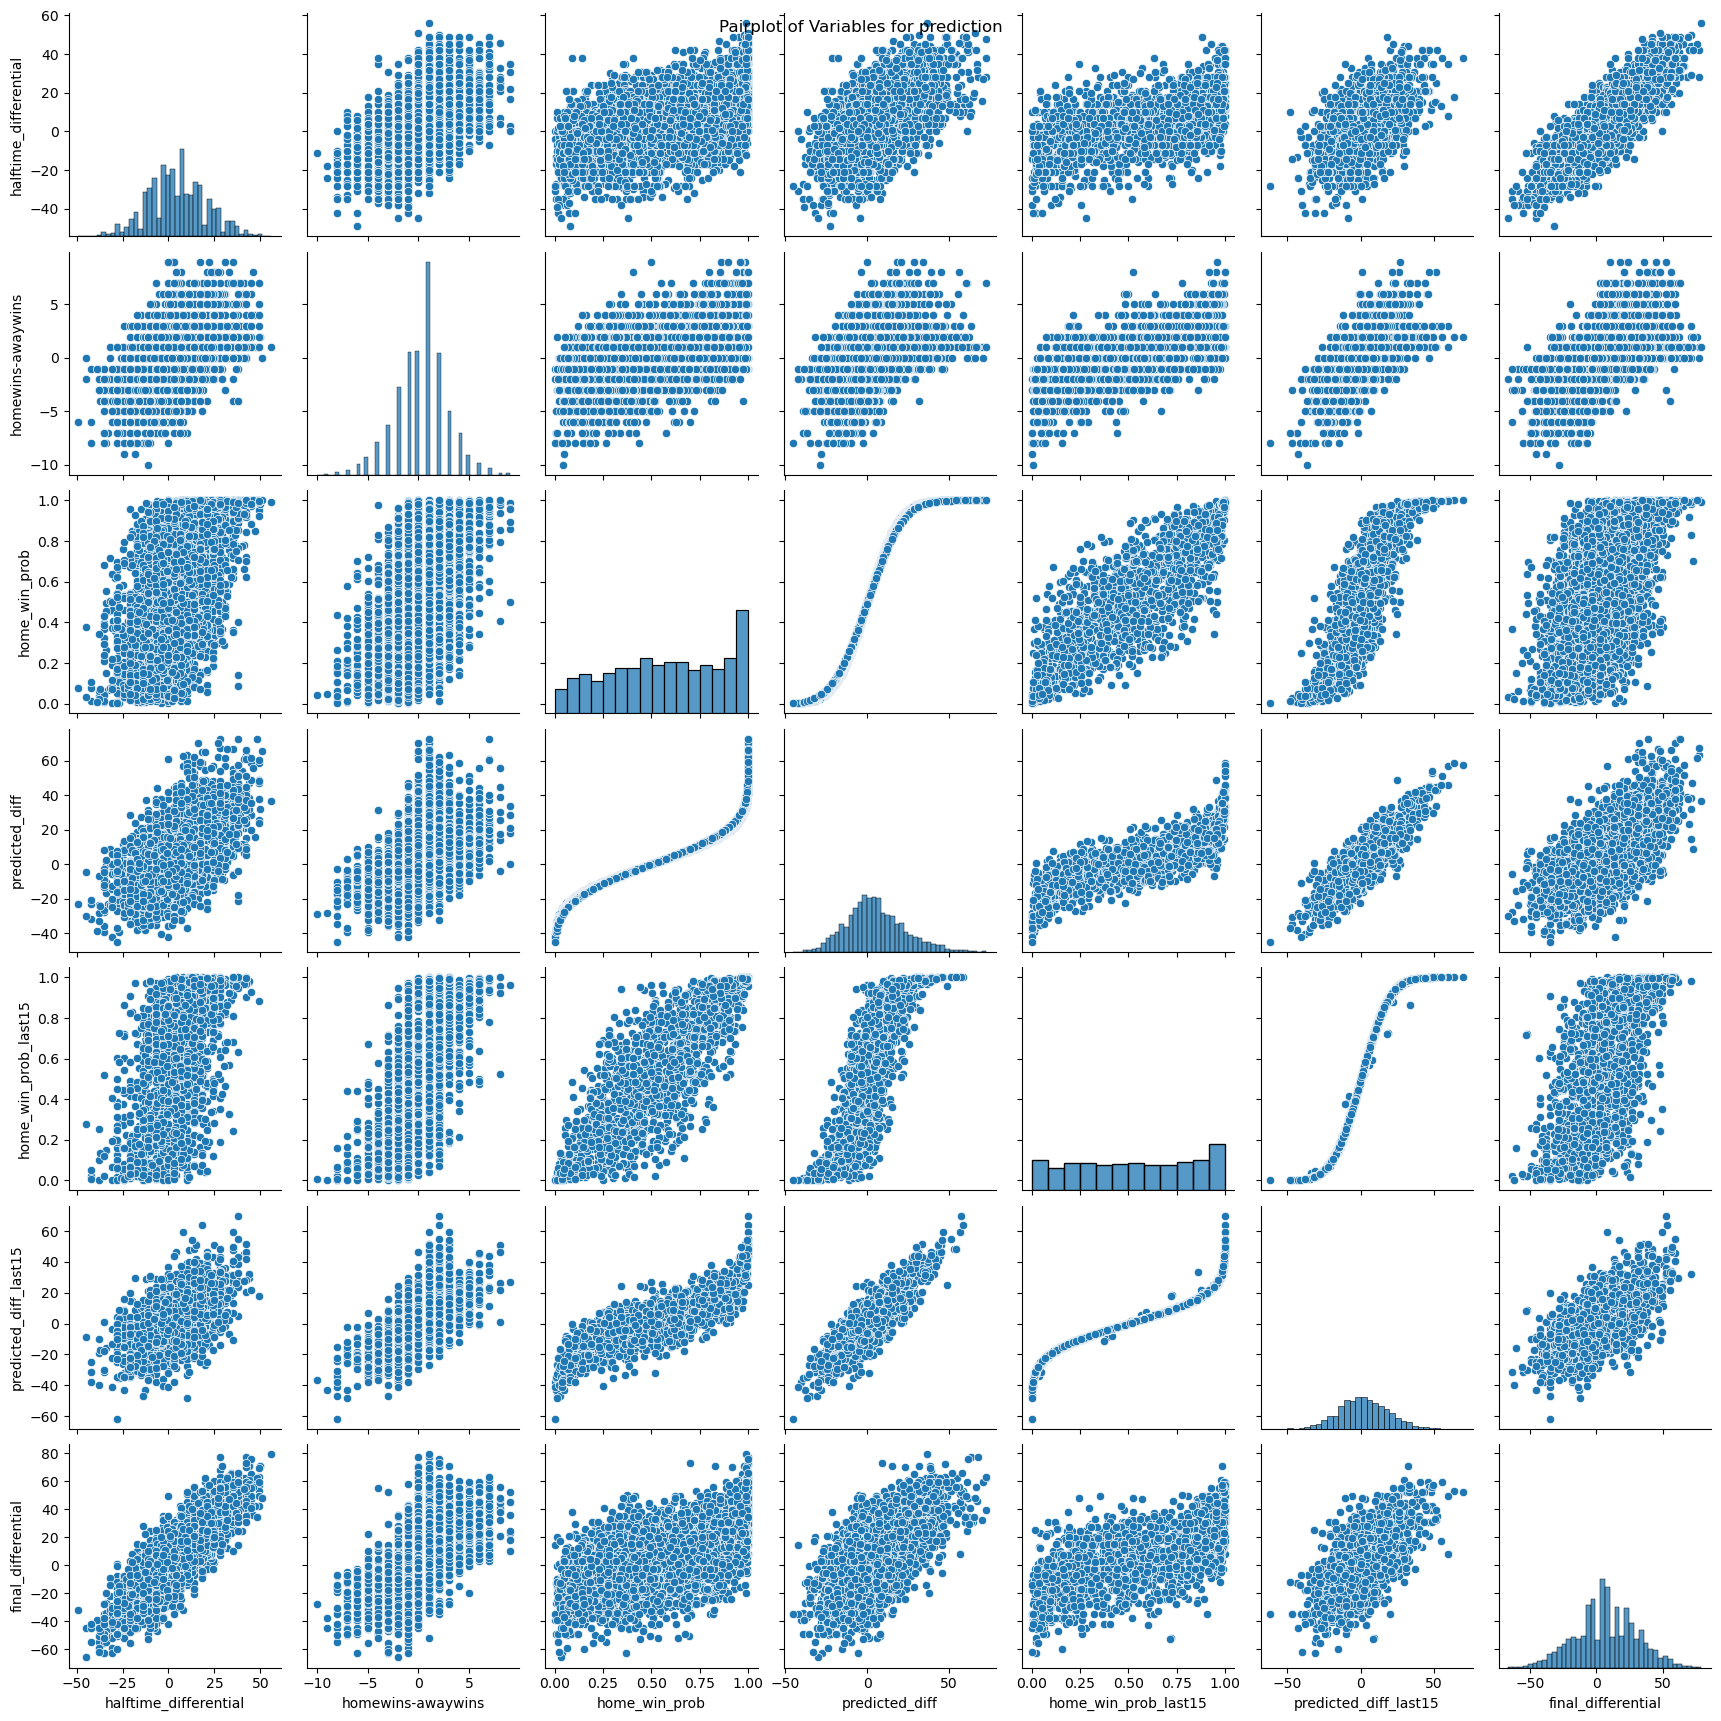

In [7]:
sns.pairplot(football[['halftime_differential','homewins-awaywins','home_win_prob','predicted_diff','home_win_prob_last15','predicted_diff_last15','final_differential']])
plt.suptitle('Pairplot of Variables for prediction')
plt.savefig('figures/pairplot.jpeg', bbox_inches="tight")

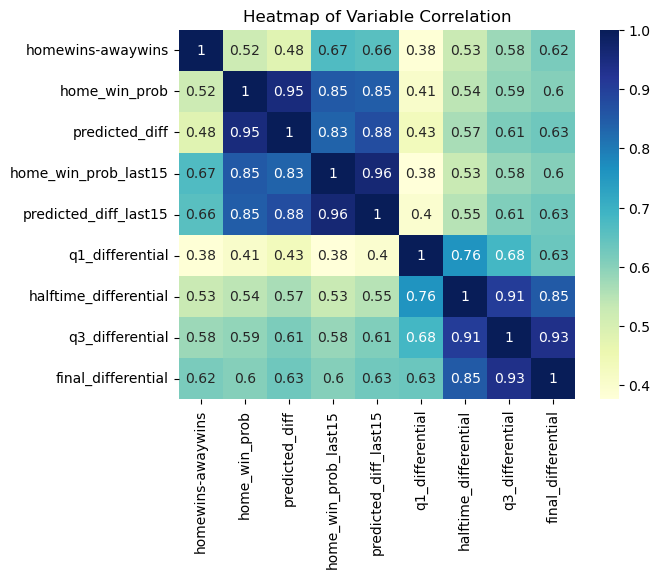

In [8]:
sns.heatmap(football[['homewins-awaywins','home_win_prob','predicted_diff','home_win_prob_last15',
                      'predicted_diff_last15','q1_differential','halftime_differential',
                      'q3_differential','final_differential']].corr(),
            annot=True,cmap='YlGnBu')
plt.title('Heatmap of Variable Correlation')
plt.savefig('figures/heatmap.jpeg', bbox_inches="tight")

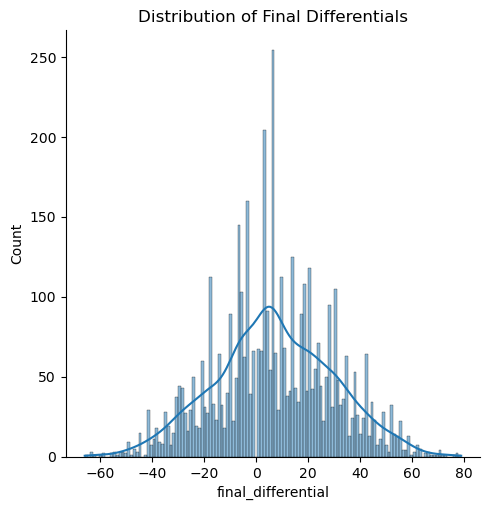

In [13]:
sns.displot(data=football,x='final_differential',
            bins=len(football['final_differential'].unique()),kde=True)
plt.title('Distribution of Final Differentials')
plt.savefig('figures/final_diff_dist.jpeg', bbox_inches="tight")

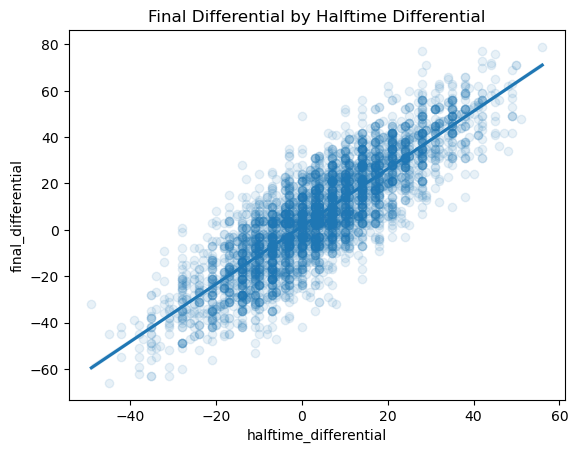

In [10]:
sns.regplot(data=football,x='halftime_differential',y='final_differential',scatter_kws={'alpha':0.1})
plt.title('Final Differential by Halftime Differential')
plt.savefig('figures/final_by_half.jpeg', bbox_inches="tight")

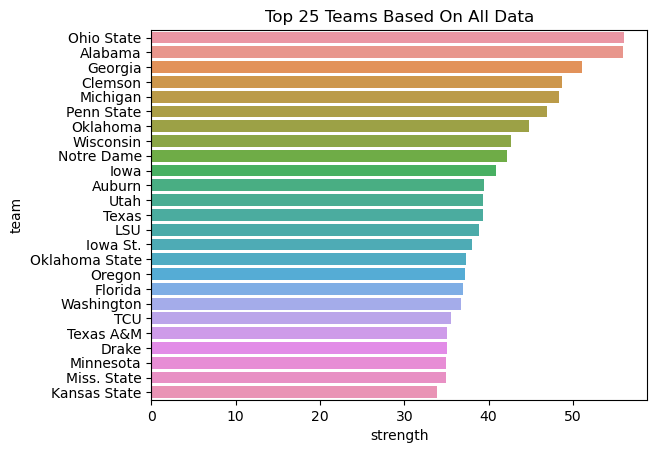

In [11]:
filtered_df = football

# get the teams
teams = pd.concat([filtered_df['home_team'], filtered_df['away_team']]).unique()
teams_df = pd.DataFrame({'Team': sorted(teams)})
teams = {team: index for index, team in enumerate(teams_df['Team'])}

# Regression to get Theta values
n = len(filtered_df)
X = np.zeros((n,len(teams)))
Y = np.zeros((n,1))


for index, row in filtered_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    # set winning team to 1 and losing team to -1
    X[index][teams[home]] = 1
    X[index][teams[away]] = -1
    Y[index] = row['final_differential']

top = np.eye(len(teams)-1,len(teams)-1)
bottom = np.zeros((1,len(teams)-1))
W = np.vstack((top,bottom))
Xstar = np.matmul(X,W)

thetahat = np.matmul(W,np.linalg.inv(np.matmul(np.transpose(Xstar),Xstar))@np.matmul(Xstar.T,Y))

thetas = pd.DataFrame({'team':list(teams.keys()),'strength':list(thetahat)})
thetas['strength'] = thetas['strength'].apply(lambda x:x.item())
thetas = thetas.sort_values('strength',ascending=False)
sns.barplot(thetas.head(25),y='team',x='strength')
plt.title('Top 25 Teams Based On All Data')
plt.savefig('figures/top_25_all.jpeg', bbox_inches="tight")


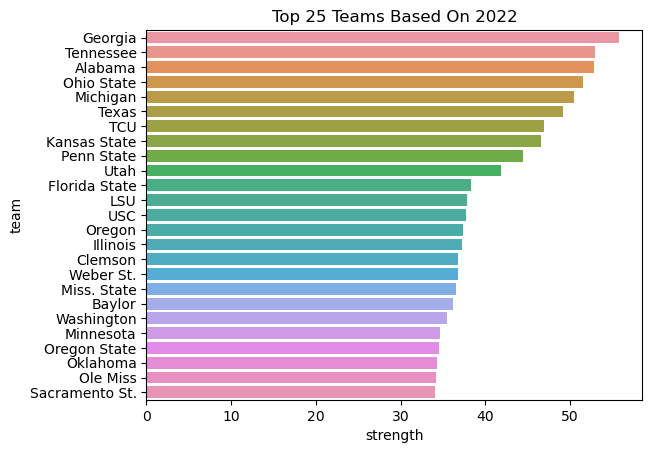

In [12]:
filtered_df = football[football['year']==2022]

# get the teams
teams = pd.concat([filtered_df['home_team'], filtered_df['away_team']]).unique()
teams_df = pd.DataFrame({'Team': sorted(teams)})
teams = {team: index for index, team in enumerate(teams_df['Team'])}

# Regression to get Theta values
n = len(filtered_df)
X = np.zeros((n,len(teams)))
Y = np.zeros((n,1))

i = 0
for index, row in filtered_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    # set winning team to 1 and losing team to -1
    X[i][teams[home]] = 1
    X[i][teams[away]] = -1
    Y[i] = row['final_differential']
    i += 1

top = np.eye(len(teams)-1,len(teams)-1)
bottom = np.zeros((1,len(teams)-1))
W = np.vstack((top,bottom))
Xstar = np.matmul(X,W)

thetahat = np.matmul(W,np.linalg.inv(np.matmul(np.transpose(Xstar),Xstar))@np.matmul(Xstar.T,Y))

thetas = pd.DataFrame({'team':list(teams.keys()),'strength':list(thetahat)})
thetas['strength'] = thetas['strength'].apply(lambda x:x.item())
thetas = thetas.sort_values('strength',ascending=False)
sns.barplot(thetas.head(25),y='team',x='strength')
plt.title('Top 25 Teams Based On 2022')
plt.savefig('figures/top_25_2022.jpeg', bbox_inches="tight")
